# Introduction

###### **Dataset Information**
The dataset (**Default of Credit Card Clients Dataset**) used in this notbook contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.


## Variables
There are 25 variables:

* ID: ID of each client
* LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
* SEX: Gender (1=male, 2=female)
* EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
* MARRIAGE: Marital status (1=married, 2=single, 3=others)
* AGE: Age in years
* PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)
* PAY_2: Repayment status in August, 2005 (scale same as above)
* PAY_3: Repayment status in July, 2005 (scale same as above)
* PAY_4: Repayment status in June, 2005 (scale same as above)
* PAY_5: Repayment status in May, 2005 (scale same as above)
* PAY_6: Repayment status in April, 2005 (scale same as above)
* BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
* BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
* BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
* BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
* BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
* BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
* PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
* PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
* PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
* PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
* PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
* PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
* default.payment.next.month: Default payment (1=yes, 0=no)

## Goal and plan

The Goal is to predict the clients who will default next month based on their information for previous months.

The notebook is structured as follows:

* First exploration: just to see what we have.
* Cleaning: time to make choices about undocumented labels
* Feature selection using random forest and feature engineering.
* Machine learning to predict the target value and compare the results of different models.


In [1]:
# Importing required libraries.
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [179]:
from sklearn.model_selection import GridSearchCV

In [2]:
data=r'C:\Users\bhardwaj\Downloads\default-of-credit-card-clients-dataset\UCI_Credit_Card.csv'

In [3]:
df=pd.read_csv(data)

In [4]:
df.set_index('ID',inplace=True)

In [5]:
df.isnull().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

There are no missing values in the data.

In [6]:
df.dtypes

LIMIT_BAL                     float64
SEX                             int64
EDUCATION                       int64
MARRIAGE                        int64
AGE                             int64
PAY_0                           int64
PAY_2                           int64
PAY_3                           int64
PAY_4                           int64
PAY_5                           int64
PAY_6                           int64
BILL_AMT1                     float64
BILL_AMT2                     float64
BILL_AMT3                     float64
BILL_AMT4                     float64
BILL_AMT5                     float64
BILL_AMT6                     float64
PAY_AMT1                      float64
PAY_AMT2                      float64
PAY_AMT3                      float64
PAY_AMT4                      float64
PAY_AMT5                      float64
PAY_AMT6                      float64
default.payment.next.month      int64
dtype: object

All the variables are in the form of integers or float.

In [7]:
df.head(10)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
2,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
3,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
4,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
5,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
6,50000.0,1,1,2,37,0,0,0,0,0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0
7,500000.0,1,1,2,29,0,0,0,0,0,...,542653.0,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,0
8,100000.0,2,2,2,23,0,-1,-1,0,0,...,221.0,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0
9,140000.0,2,3,1,28,0,0,2,0,0,...,12211.0,11793.0,3719.0,3329.0,0.0,432.0,1000.0,1000.0,1000.0,0


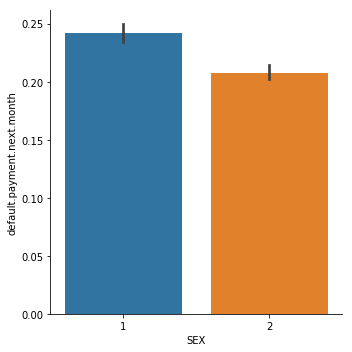

In [8]:
sns.catplot(x='SEX',y='default.payment.next.month', kind="bar",data=df)

Men default more than women.

In [9]:
df = df.rename(columns = {"default.payment.next.month":"def_pay"}) 

In [10]:
df['def_pay'].value_counts()

0    23364
1     6636
Name: def_pay, dtype: int64

In [11]:
df['SEX'].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

In [12]:
grouped = df.groupby(['SEX','def_pay'])
grouped.size()

SEX  def_pay
1    0           9015
     1           2873
2    0          14349
     1           3763
dtype: int64

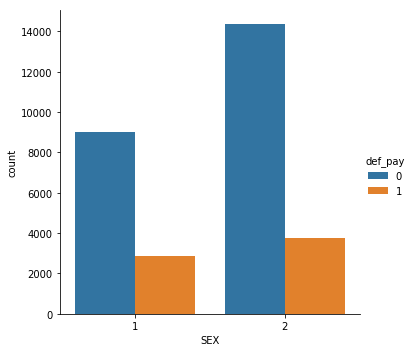

In [13]:
sns.catplot(x='SEX',hue='def_pay', kind="count",data=df)

In absolute number, there are more defaulters in women because of larger share of women in total clients.

In [14]:
df.PAY_2.value_counts()

 0    15730
-1     6050
 2     3927
-2     3782
 3      326
 4       99
 1       28
 5       25
 7       20
 6       12
 8        1
Name: PAY_2, dtype: int64

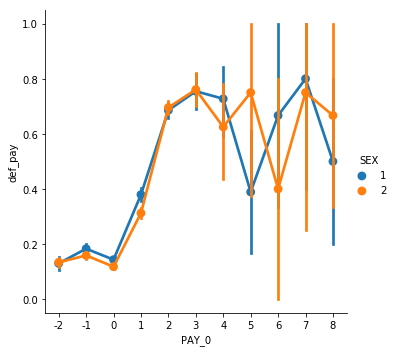

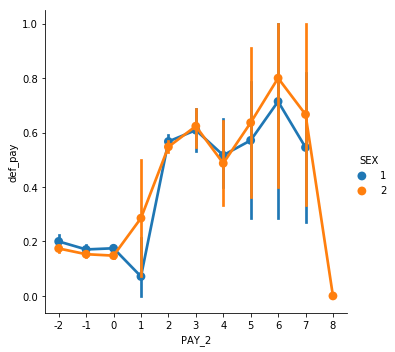

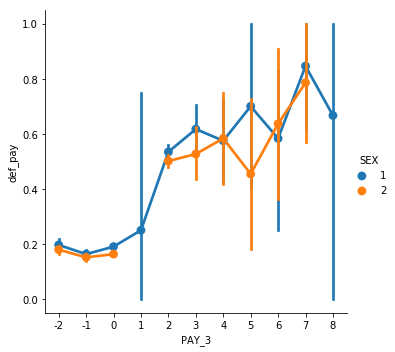

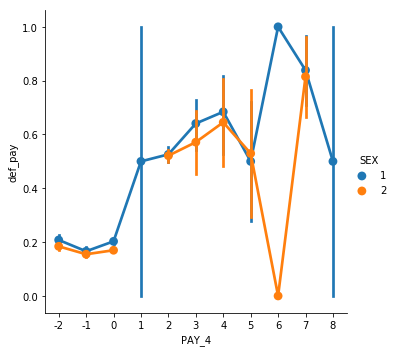

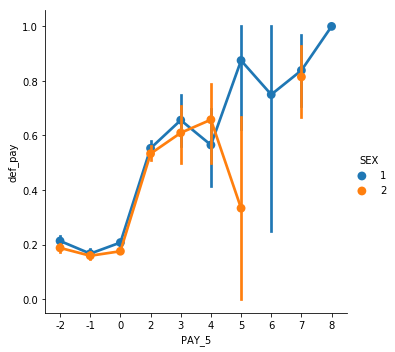

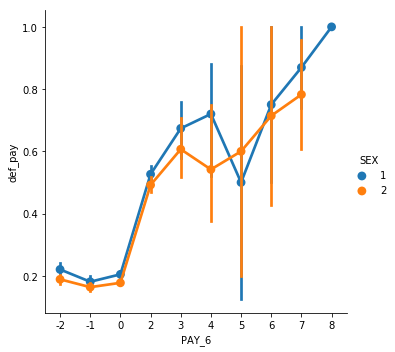

In [15]:
cols = ['PAY_0', 'PAY_2','PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
for i in cols:
    sns.catplot(x=i,y='def_pay',hue='SEX', kind="point",data=df);

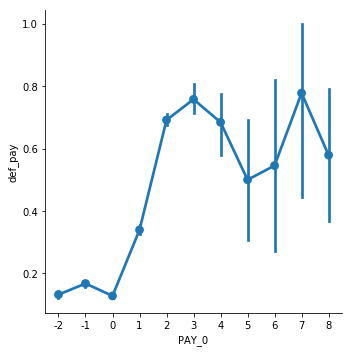

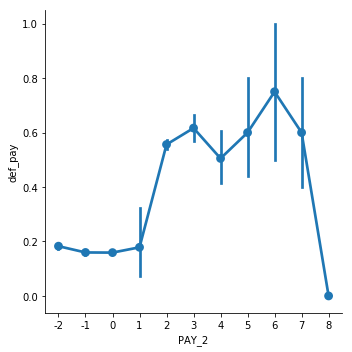

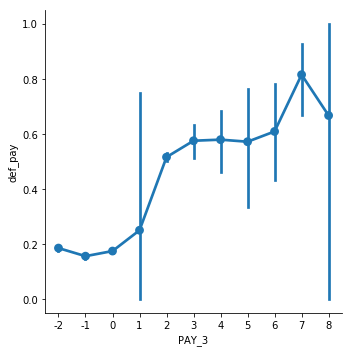

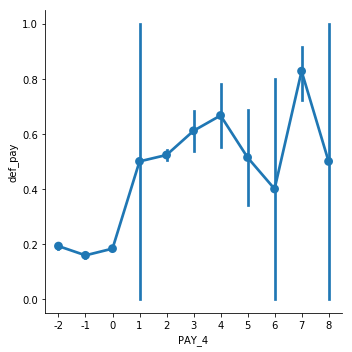

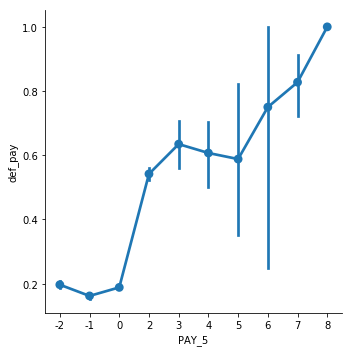

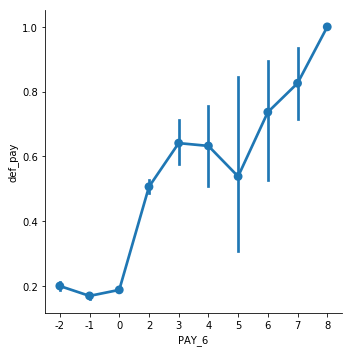

In [16]:
cols = ['PAY_0', 'PAY_2','PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
for i in cols:
    sns.catplot(x=i,y='def_pay', kind="point",data=df);

The clients whose payment has been delayed in the past are more likely to default next month.

In [17]:
df['def_pay'].value_counts()  ##UNBALANCED DATASET

0    23364
1     6636
Name: def_pay, dtype: int64

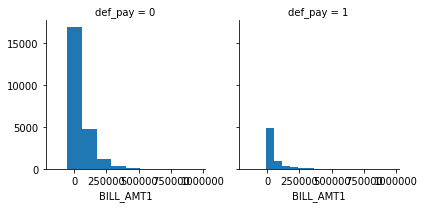

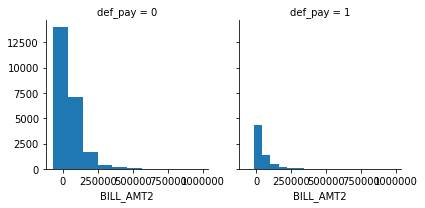

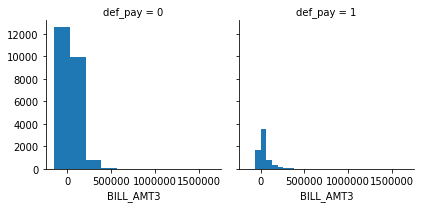

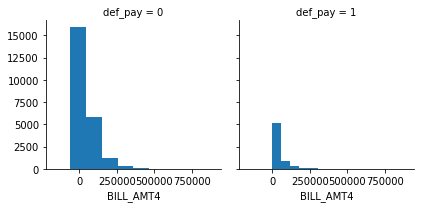

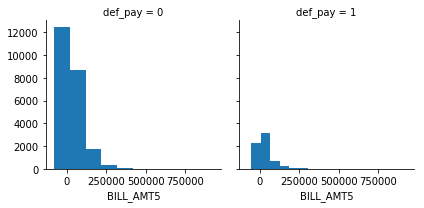

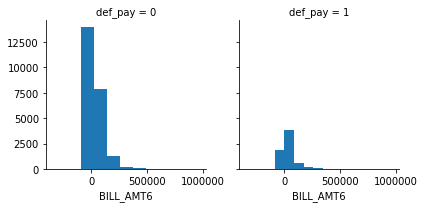

In [18]:
cols = 'BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6'
for i in cols:
    g = sns.FacetGrid(df, col="def_pay")
    g.map(plt.hist, i)

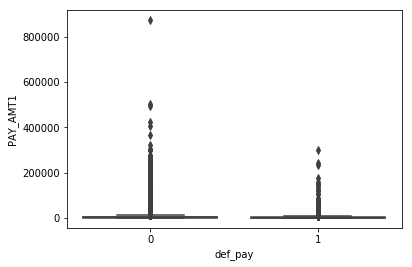

In [19]:
sns.boxplot(x="def_pay", y='PAY_AMT1', data=df)

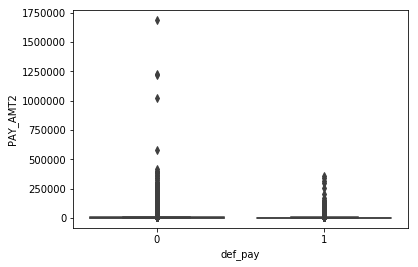

In [20]:
sns.boxplot(x="def_pay", y='PAY_AMT2', data=df)

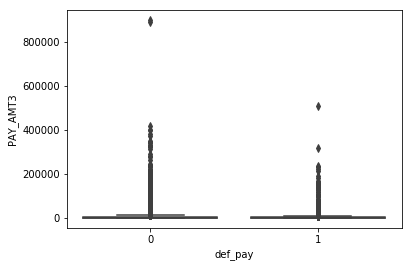

In [21]:
sns.boxplot(x="def_pay", y='PAY_AMT3', data=df)

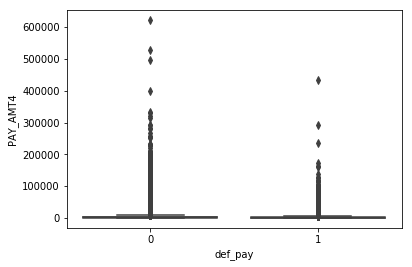

In [22]:
sns.boxplot(x="def_pay", y='PAY_AMT4', data=df)

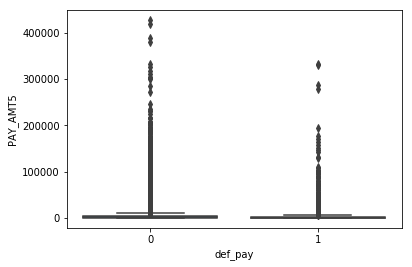

In [23]:
sns.boxplot(x="def_pay", y='PAY_AMT5', data=df)

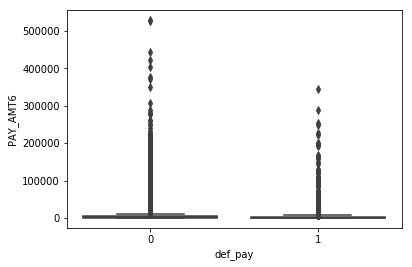

In [24]:
sns.boxplot(x="def_pay", y='PAY_AMT6', data=df)

Previous payment done by non-defaulters are higher than that done by defaulters.

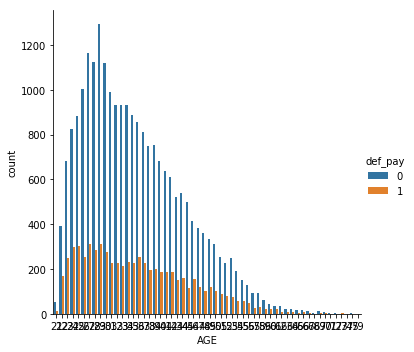

In [25]:
sns.catplot(x='AGE',hue='def_pay', kind="count",data=df)

This distribution tells there are more young people as clients. Later in the notebook, I will create variable Agebin and divide the clients into different age groups.

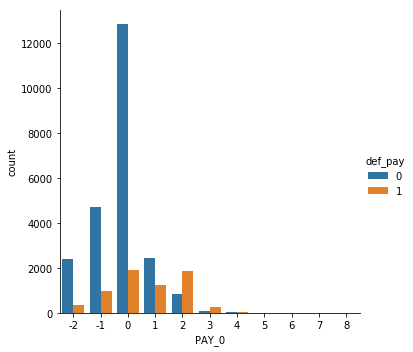

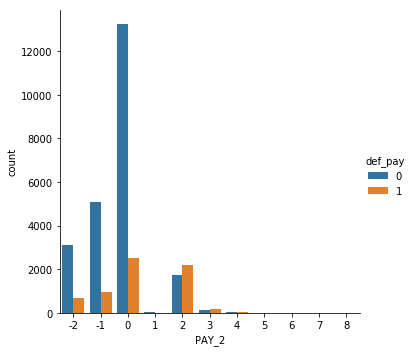

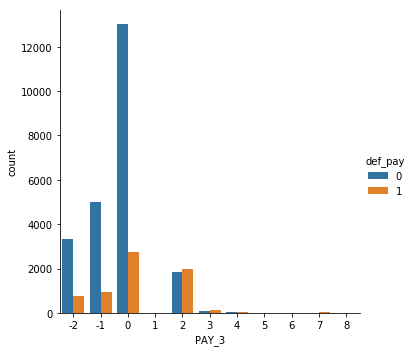

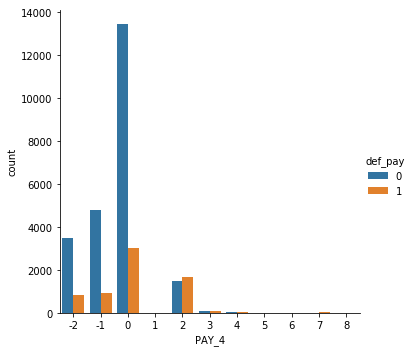

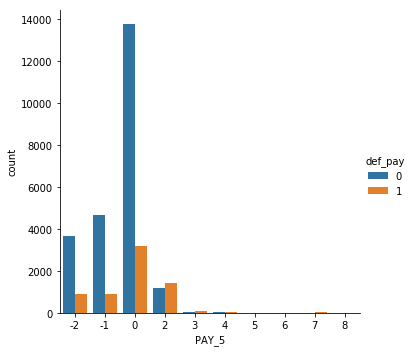

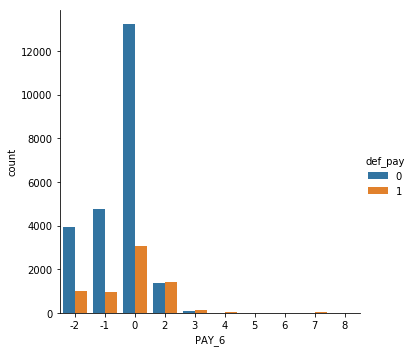

In [26]:
cols =  'PAY_0', 'PAY_2','PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'
for i in cols:
    sns.catplot(x=i,hue='def_pay', kind="count",data=df)

In [27]:
df.EDUCATION.value_counts() # Similarly it can be that is for something that do not have data. But I am changing it to unknown.

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [28]:
df.EDUCATION[df.EDUCATION == 0] = 6

C:\Users\bhardwaj\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


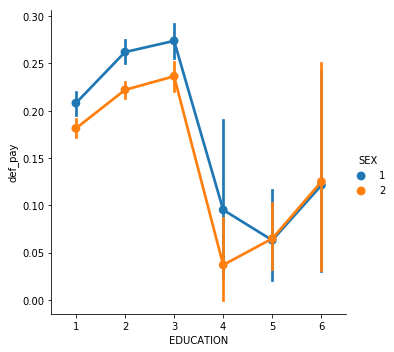

In [29]:
sns.catplot(x='EDUCATION',y='def_pay',hue='SEX', kind="point",data=df);  

It says the clients who are graduated are less likely to default as compared to the one who are educated upto high school.
And yes male are more probable to default than female.

In [30]:
df.MARRIAGE.value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

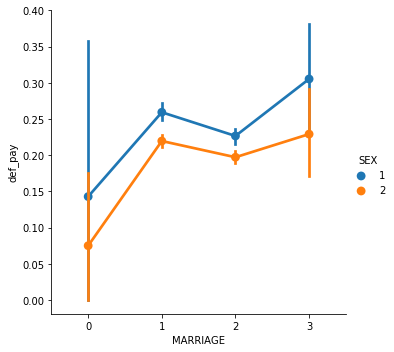

In [31]:
sns.catplot(x='MARRIAGE',y='def_pay',hue='SEX', kind="point",data=df)

Married male/female more likely to default than unmarried male/female.

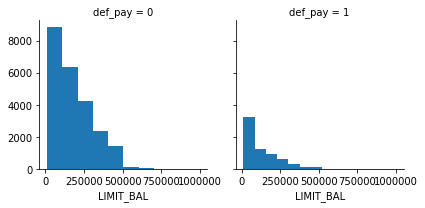

In [32]:
g = sns.FacetGrid(df, col="def_pay")
g.map(plt.hist, 'LIMIT_BAL')

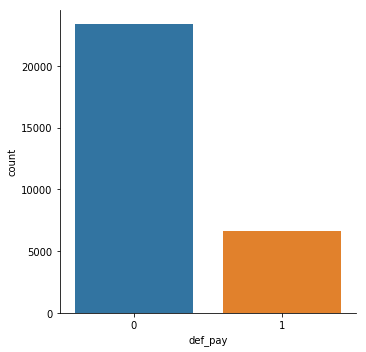

In [33]:
sns.catplot(x='def_pay', kind="count",data=df)

Dataset is imbalanced.

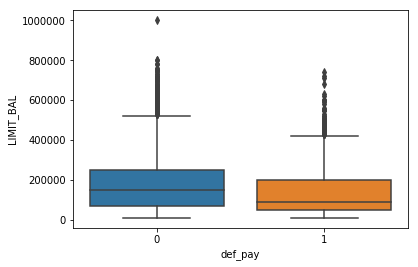

In [34]:
sns.boxplot(x="def_pay", y='LIMIT_BAL', data=df)

In [39]:
df.rename(columns={"PAY_0": "PAY_1"},inplace=True)


On average, the amount of given credit to defaulters is less than that for non-defaulters.

In [40]:
X=df[['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]

In [41]:
y=df['def_pay']

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=1)

##### K nearest neighbor

Right now using all the variables and k nearestneighbour algorithm just for testing.

In [43]:
knn = KNeighborsClassifier(n_neighbors=5)

In [44]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [45]:
y_pred = knn.predict(X_test)

In [46]:
confusion_matrix(y_test, y_pred)

array([[6428,  572],
       [1626,  374]], dtype=int64)

In [47]:
auc = roc_auc_score(y_test, y_pred)

In [48]:
print('AUC: %.2f' % auc)

AUC: 0.55


In [49]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

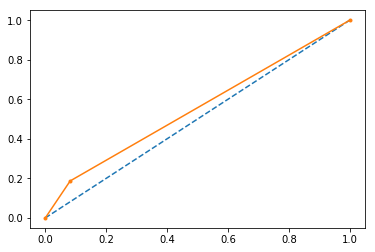

In [50]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

In [51]:
from sklearn.metrics import f1_score

In [52]:
f1_score(y_true = y_test, y_pred = y_pred)

0.25390359809911744

In [53]:
scores = cross_val_score(knn,X_train, y_train, cv=5)
print ("Cross-validated scores:", scores)
print ("Average Cross-validated score:", scores.mean())

Cross-validated scores: [0.75309524 0.74214286 0.74642857 0.75285714 0.76166667]
Average Cross-validated score: 0.7512380952380953


###### Random Forest

I am using random forest to find importance of features.

In [54]:
from sklearn.ensemble import RandomForestClassifier

In [55]:
regr = RandomForestClassifier(max_features=7,n_estimators=10)

In [56]:
import sklearn

In [57]:
regr=regr.fit(X_train,y_train)

In [58]:
rfpred=regr.predict(X_test)

In [59]:
accuracy_score(y_test,rfpred)

0.8053333333333333

Accuracy is 80%. But since data is imbalanced we need a better way for evaluation.

In [60]:
confusion_matrix(y_test, rfpred)

array([[6623,  377],
       [1375,  625]], dtype=int64)

In [61]:
auc1 = roc_auc_score(y_test, rfpred)

In [62]:
auc1

0.6293214285714286

It says 63% of the data is correctly predicted.

In [63]:
df.shape

(30000, 24)

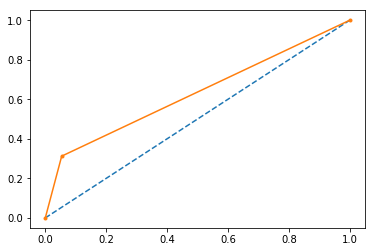

In [64]:
fpr, tpr, thresholds = roc_curve(y_test,rfpred)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

In [65]:
scores = cross_val_score(regr,X_train, y_train, cv=5)
print ("Cross-validated scores:", scores)
print ("Average Cross-validated score:", scores.mean())

Cross-validated scores: [0.8102381  0.79261905 0.80714286 0.80071429 0.81857143]
Average Cross-validated score: 0.8058571428571429


In [66]:
regr.feature_importances_

array([0.05564065, 0.01219979, 0.0216453 , 0.01319974, 0.07267022,
       0.11509757, 0.06382046, 0.01361462, 0.01419474, 0.01991784,
       0.01124002, 0.06208431, 0.05114701, 0.04929566, 0.04908103,
       0.04675472, 0.04852849, 0.05052597, 0.04622393, 0.0449923 ,
       0.04342602, 0.04586047, 0.04883913])

In [67]:
for name, importance in zip(X, regr.feature_importances_):
    print(name, "=", importance)

LIMIT_BAL = 0.05564065302697182
SEX = 0.012199787884786534
EDUCATION = 0.021645302005700508
MARRIAGE = 0.013199742549481258
AGE = 0.07267021783664851
PAY_1 = 0.11509757477297138
PAY_2 = 0.06382045736722018
PAY_3 = 0.013614620798206462
PAY_4 = 0.014194737436123959
PAY_5 = 0.019917835413073563
PAY_6 = 0.011240023634166528
BILL_AMT1 = 0.06208431438540143
BILL_AMT2 = 0.05114701055378521
BILL_AMT3 = 0.049295663245384445
BILL_AMT4 = 0.04908103479364169
BILL_AMT5 = 0.04675471555508302
BILL_AMT6 = 0.04852848655395229
PAY_AMT1 = 0.05052597186770965
PAY_AMT2 = 0.04622393142071207
PAY_AMT3 = 0.04499229757813698
PAY_AMT4 = 0.04342602034475272
PAY_AMT5 = 0.04586047078072852
PAY_AMT6 = 0.04883913019536132


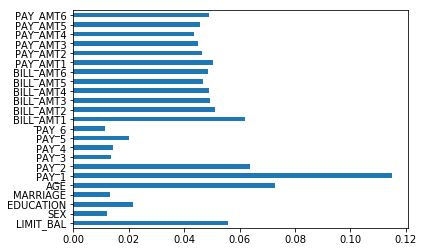

In [68]:
feat_importances = pd.Series(regr.feature_importances_, index=X.columns)
feat_importances.plot(kind='barh')

Some most important variables in prediction are Pay_1, Age and Limit_bal.

In [69]:
df['LIMIT_BAL'].describe() # Range of given credit is quite high.

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

In [70]:
df['SEX'].value_counts() / 30000  # 60% of clients are women.

2    0.603733
1    0.396267
Name: SEX, dtype: float64

In [71]:
df['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

Others can include divorced may be but 0 is not any category. 0 can be clients for whom we do not have this information.

In [72]:
df.MARRIAGE[df.MARRIAGE==0]=3

C:\Users\bhardwaj\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [73]:
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       65
Name: EDUCATION, dtype: int64

(array([6.270e+02, 2.058e+03, 2.442e+03, 2.886e+03, 3.000e+03, 2.375e+03,
        2.308e+03, 2.221e+03, 1.985e+03, 1.824e+03, 1.618e+03, 1.370e+03,
        1.187e+03, 9.670e+02, 4.520e+02, 7.510e+02, 6.290e+02, 4.560e+02,
        3.000e+02, 2.050e+02, 1.230e+02, 7.500e+01, 5.500e+01, 4.100e+01,
        2.000e+01, 1.300e+01, 7.000e+00, 4.000e+00, 0.000e+00, 1.000e+00]),
 array([21.        , 22.93333333, 24.86666667, 26.8       , 28.73333333,
        30.66666667, 32.6       , 34.53333333, 36.46666667, 38.4       ,
        40.33333333, 42.26666667, 44.2       , 46.13333333, 48.06666667,
        50.        , 51.93333333, 53.86666667, 55.8       , 57.73333333,
        59.66666667, 61.6       , 63.53333333, 65.46666667, 67.4       ,
        69.33333333, 71.26666667, 73.2       , 75.13333333, 77.06666667,
        79.        ]),
 <a list of 30 Patch objects>)

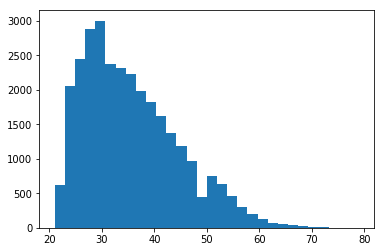

In [74]:
plt.hist(df['AGE'],bins=30)

In [75]:
cols =  'PAY_1', 'PAY_2','PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'
for i in cols:
    print(df[i].value_counts())

 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: PAY_1, dtype: int64
 0    15730
-1     6050
 2     3927
-2     3782
 3      326
 4       99
 1       28
 5       25
 7       20
 6       12
 8        1
Name: PAY_2, dtype: int64
 0    15764
-1     5938
-2     4085
 2     3819
 3      240
 4       76
 7       27
 6       23
 5       21
 1        4
 8        3
Name: PAY_3, dtype: int64
 0    16455
-1     5687
-2     4348
 2     3159
 3      180
 4       69
 7       58
 5       35
 6        5
 8        2
 1        2
Name: PAY_4, dtype: int64
 0    16947
-1     5539
-2     4546
 2     2626
 3      178
 4       84
 7       58
 5       17
 6        4
 8        1
Name: PAY_5, dtype: int64
 0    16286
-1     5740
-2     4895
 2     2766
 3      184
 4       49
 7       46
 6       19
 5       13
 8        2
Name: PAY_6, dtype: int64


C:\Users\bhardwaj\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


(array([1.08103448e-02, 3.54827586e-02, 4.21034483e-02, 4.97586207e-02,
        5.17241379e-02, 4.09482759e-02, 3.97931034e-02, 3.82931034e-02,
        3.42241379e-02, 3.14482759e-02, 2.78965517e-02, 2.36206897e-02,
        2.04655172e-02, 1.66724138e-02, 7.79310345e-03, 1.29482759e-02,
        1.08448276e-02, 7.86206897e-03, 5.17241379e-03, 3.53448276e-03,
        2.12068966e-03, 1.29310345e-03, 9.48275862e-04, 7.06896552e-04,
        3.44827586e-04, 2.24137931e-04, 1.20689655e-04, 6.89655172e-05,
        0.00000000e+00, 1.72413793e-05]),
 array([21.        , 22.93333333, 24.86666667, 26.8       , 28.73333333,
        30.66666667, 32.6       , 34.53333333, 36.46666667, 38.4       ,
        40.33333333, 42.26666667, 44.2       , 46.13333333, 48.06666667,
        50.        , 51.93333333, 53.86666667, 55.8       , 57.73333333,
        59.66666667, 61.6       , 63.53333333, 65.46666667, 67.4       ,
        69.33333333, 71.26666667, 73.2       , 75.13333333, 77.06666667,
        79.     

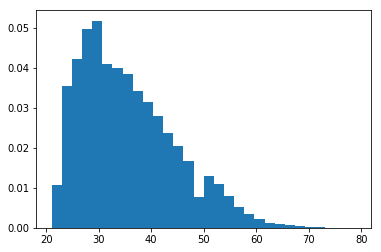

In [78]:
plt.hist(df['AGE'],bins=30,normed=1)

In [79]:
df.AGE.describe()

count    30000.000000
mean        35.485500
std          9.217904
min         21.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         79.000000
Name: AGE, dtype: float64

Creating Age groups with variable name AgeBin.

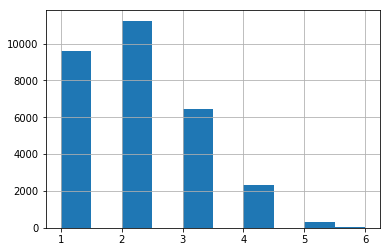

In [80]:
df['AgeBin'] = 0 #creates a column of 0
df.loc[((df['AGE'] > 20) & (df['AGE'] < 30)) , 'AgeBin'] = 1
df.loc[((df['AGE'] >= 30) & (df['AGE'] < 40)) , 'AgeBin'] = 2
df.loc[((df['AGE'] >= 40) & (df['AGE'] < 50)) , 'AgeBin'] = 3
df.loc[((df['AGE'] >= 50) & (df['AGE'] < 60)) , 'AgeBin'] = 4
df.loc[((df['AGE'] >= 60) & (df['AGE'] < 70)) , 'AgeBin'] = 5
df.loc[((df['AGE'] >= 70) & (df['AGE'] < 81)) , 'AgeBin'] = 6
df.AgeBin.hist()

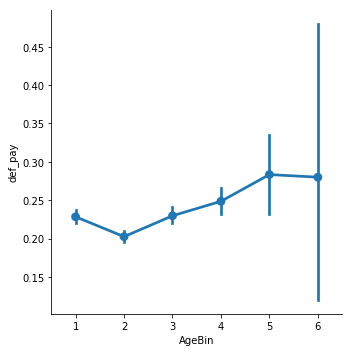

In [81]:
sns.catplot(x='AgeBin',y='def_pay', kind="point",data=df)
## It says on average probability of default increases with increase in age.

In [82]:
df['AgeBin'].value_counts()

2    11238
1     9618
3     6464
4     2341
5      314
6       25
Name: AgeBin, dtype: int64

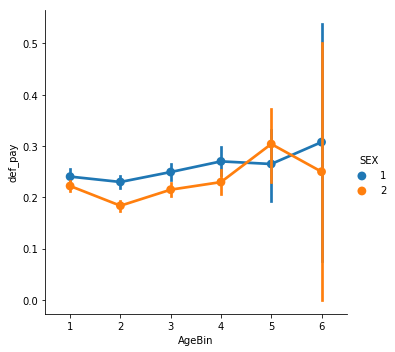

In [83]:
sns.catplot(x='AgeBin',y='def_pay',hue='SEX', kind="point",data=df)

With probability of default higher for male than female in almost every age group.

Since, Pay_1 includes payment status for last 9 months so  it might include payment status for some clients for previous months. Or may be who default often will have same status of delayed pay. Therefore, payment status variables might be highly correlated with each other.

In [84]:
df.PAY_1.value_counts()

 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: PAY_1, dtype: int64

 Here 0 value could mean two things:
1. 0 stands for missing values in the data.
2. 0 stands for those who paid duly.

 I am considering 2nd possibilty and converting negative values to 0 too because no label is assigned to these negatice values.

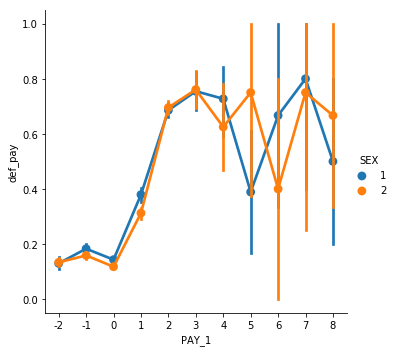

In [85]:
sns.catplot(x='PAY_1',y='def_pay',hue='SEX', kind="point",data=df)

In [86]:
df.PAY_1[df.PAY_1 == -1] = 0
df.PAY_1[df.PAY_1 == -2] = 0

C:\Users\bhardwaj\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\bhardwaj\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


(array([2.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 1.5085e+04,
        6.7990e+03, 3.0820e+03, 1.7840e+03, 1.1410e+03, 7.7700e+02,
        4.4700e+02, 3.1000e+02, 1.8400e+02, 1.2500e+02, 8.8000e+01,
        6.4000e+01, 3.7000e+01, 4.2000e+01, 1.2000e+01, 8.0000e+00,
        7.0000e+00, 3.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([-165580. , -127910.3,  -90240.6,  -52570.9,  -14901.2,   22768.5,
          60438.2,   98107.9,  135777.6,  173447.3,  211117. ,  248786.7,
         286456.4,  324126.1,  361795.8,  399465.5,  437135.2,  474804.9,
         512474.6,  550144.3,  587814. ,  625483.7,  663153.4,  700823.1,
         738492.8,  776162.5,  813832.2,  851501.9,  889171.6,  926841.3,
         964511. ]),
 <a list of 30 Patch objects>)

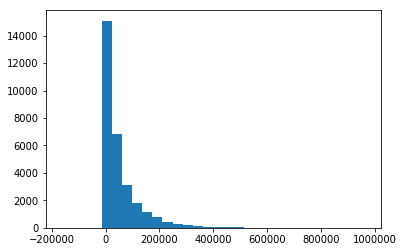

In [87]:
plt.hist(df['BILL_AMT1'],bins=30)

In [88]:
df.BILL_AMT1.describe()

count     30000.000000
mean      51223.330900
std       73635.860576
min     -165580.000000
25%        3558.750000
50%       22381.500000
75%       67091.000000
max      964511.000000
Name: BILL_AMT1, dtype: float64

Negative amount in bill statement means that you have overpaid the due amount on your credit card.

In [89]:
df['bill 1 / limit bal' ]=df['BILL_AMT1']/df['LIMIT_BAL']

In [90]:
df['bill 2 / limit bal' ]=df['BILL_AMT2']/df['LIMIT_BAL']

In [91]:
df['bill 3 / limit bal' ]=df['BILL_AMT3']/df['LIMIT_BAL']

In [92]:
df['bill 4 / limit bal' ]=df['BILL_AMT4']/df['LIMIT_BAL']

In [93]:
df['bill 5 / limit bal' ]=df['BILL_AMT5']/df['LIMIT_BAL']

In [94]:
df['bill 6 / limit bal' ]=df['BILL_AMT6']/df['LIMIT_BAL']

(array([2.0000e+00, 3.0000e+00, 1.0886e+04, 4.2390e+03, 3.3740e+03,
        3.4300e+03, 7.1840e+03, 6.0600e+02, 1.1400e+02, 6.2000e+01,
        5.7000e+01, 1.5000e+01, 1.0000e+01, 2.0000e+00, 3.0000e+00,
        1.0000e+00, 4.0000e+00, 2.0000e+00, 2.0000e+00, 1.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([-0.619892  , -0.38405227, -0.14821253,  0.0876272 ,  0.32346693,
         0.55930667,  0.7951464 ,  1.03098613,  1.26682587,  1.5026656 ,
         1.73850533,  1.97434507,  2.2101848 ,  2.44602453,  2.68186427,
         2.917704  ,  3.15354373,  3.38938347,  3.6252232 ,  3.86106293,
         4.09690267,  4.3327424 ,  4.56858213,  4.80442187,  5.0402616 ,
         5.27610133,  5.51194107,  5.7477808 ,  5.98362053,  6.21946027,
         6.4553    ]),
 <a list of 30 Patch objects>)

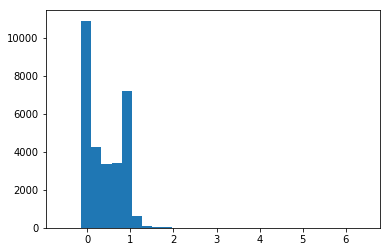

In [95]:
plt.hist(df['bill 1 / limit bal'],bins=30)

(array([1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 9.000e+00, 1.281e+04,
        3.975e+03, 3.715e+03, 4.833e+03, 4.395e+03, 1.130e+02, 6.700e+01,
        4.300e+01, 1.800e+01, 7.000e+00, 0.000e+00, 3.000e+00, 0.000e+00,
        4.000e+00, 3.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([-1.39554   , -1.13633867, -0.87713733, -0.617936  , -0.35873467,
        -0.09953333,  0.159668  ,  0.41886933,  0.67807067,  0.937272  ,
         1.19647333,  1.45567467,  1.714876  ,  1.97407733,  2.23327867,
         2.49248   ,  2.75168133,  3.01088267,  3.270084  ,  3.52928533,
         3.78848667,  4.047688  ,  4.30688933,  4.56609067,  4.825292  ,
         5.08449333,  5.34369467,  5.602896  ,  5.86209733,  6.12129867,
         6.3805    ]),
 <a list of 30 Patch objects>)

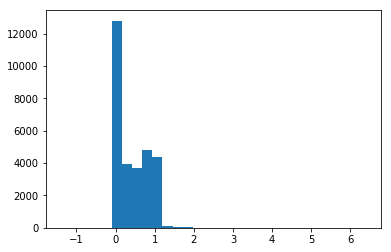

In [96]:
plt.hist(df['bill 2 / limit bal'],bins=30)

(array([3.000e+00, 0.000e+00, 1.285e+04, 6.300e+03, 6.459e+03, 4.235e+03,
        8.800e+01, 4.200e+01, 8.000e+00, 6.000e+00, 2.000e+00, 3.000e+00,
        1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([-1.0251    , -0.63464417, -0.24418833,  0.1462675 ,  0.53672333,
         0.92717917,  1.317635  ,  1.70809083,  2.09854667,  2.4890025 ,
         2.87945833,  3.26991417,  3.66037   ,  4.05082583,  4.44128167,
         4.8317375 ,  5.22219333,  5.61264917,  6.003105  ,  6.39356083,
         6.78401667,  7.1744725 ,  7.56492833,  7.95538417,  8.34584   ,
         8.73629583,  9.12675167,  9.5172075 ,  9.90766333, 10.29811917,
        10.688575  ]),
 <a list of 30 Patch objects>)

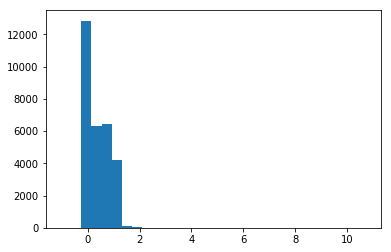

In [97]:
plt.hist(df['bill 3 / limit bal'],bins=30)

(array([1.0000e+00, 1.0000e+00, 2.0000e+00, 1.0000e+00, 5.0000e+00,
        2.0000e+01, 1.3179e+04, 3.9770e+03, 3.8840e+03, 3.4780e+03,
        4.8810e+03, 4.4100e+02, 4.8000e+01, 2.6000e+01, 2.3000e+01,
        2.1000e+01, 4.0000e+00, 3.0000e+00, 0.0000e+00, 1.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([-1.3745    , -1.15712167, -0.93974333, -0.722365  , -0.50498667,
        -0.28760833, -0.07023   ,  0.14714833,  0.36452667,  0.581905  ,
         0.79928333,  1.01666167,  1.23404   ,  1.45141833,  1.66879667,
         1.886175  ,  2.10355333,  2.32093167,  2.53831   ,  2.75568833,
         2.97306667,  3.190445  ,  3.40782333,  3.62520167,  3.84258   ,
         4.05995833,  4.27733667,  4.494715  ,  4.71209333,  4.92947167,
         5.14685   ]),
 <a list of 30 Patch objects>)

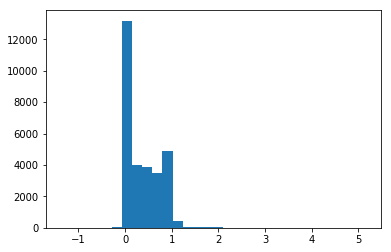

In [98]:
plt.hist(df['bill 4 / limit bal'],bins=30)

(array([3.0000e+00, 1.0000e+00, 5.0000e+00, 6.0000e+00, 1.2265e+04,
        3.9990e+03, 3.9670e+03, 3.4310e+03, 2.8510e+03, 3.2640e+03,
        1.0900e+02, 4.0000e+01, 1.5000e+01, 1.6000e+01, 1.9000e+01,
        3.0000e+00, 0.0000e+00, 2.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00]),
 array([-0.87674286, -0.68300143, -0.48926   , -0.29551857, -0.10177714,
         0.09196429,  0.28570571,  0.47944714,  0.67318857,  0.86693   ,
         1.06067143,  1.25441286,  1.44815429,  1.64189571,  1.83563714,
         2.02937857,  2.22312   ,  2.41686143,  2.61060286,  2.80434429,
         2.99808571,  3.19182714,  3.38556857,  3.57931   ,  3.77305143,
         3.96679286,  4.16053429,  4.35427571,  4.54801714,  4.74175857,
         4.9355    ]),
 <a list of 30 Patch objects>)

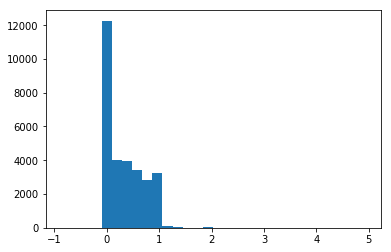

In [99]:
plt.hist(df['bill 5 / limit bal'],bins=30)

(array([1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00,
        1.0000e+00, 8.0000e+00, 3.2000e+01, 1.3282e+04, 3.5090e+03,
        3.6770e+03, 3.1700e+03, 2.6120e+03, 3.0800e+03, 5.3400e+02,
        2.8000e+01, 1.5000e+01, 1.3000e+01, 2.0000e+01, 1.0000e+01,
        1.0000e+00, 2.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([-1.50953 , -1.329694, -1.149858, -0.970022, -0.790186, -0.61035 ,
        -0.430514, -0.250678, -0.070842,  0.108994,  0.28883 ,  0.468666,
         0.648502,  0.828338,  1.008174,  1.18801 ,  1.367846,  1.547682,
         1.727518,  1.907354,  2.08719 ,  2.267026,  2.446862,  2.626698,
         2.806534,  2.98637 ,  3.166206,  3.346042,  3.525878,  3.705714,
         3.88555 ]),
 <a list of 30 Patch objects>)

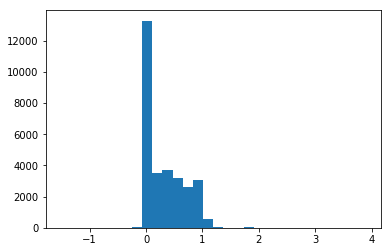

In [100]:
plt.hist(df['bill 6 / limit bal'],bins=30)

In [101]:
df['bill 1 / limit bal'].describe()

count    30000.000000
mean         0.423771
std          0.411462
min         -0.619892
25%          0.022032
50%          0.313994
75%          0.829843
max          6.455300
Name: bill 1 / limit bal, dtype: float64

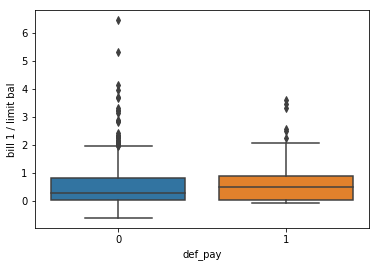

In [102]:
sns.boxplot(df['def_pay'],df['bill 1 / limit bal'])

As a proportion of balance limit, on average amount of bill statement is slightly higher for those who default. 

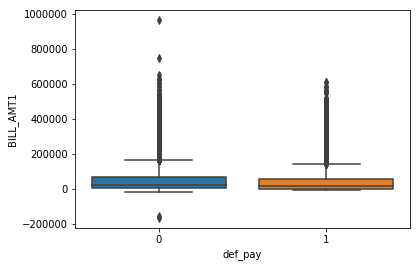

In [103]:
sns.boxplot(df['def_pay'],df['BILL_AMT1'])

In [104]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'def_pay',
       'AgeBin', 'bill 1 / limit bal', 'bill 2 / limit bal',
       'bill 3 / limit bal', 'bill 4 / limit bal', 'bill 5 / limit bal',
       'bill 6 / limit bal'],
      dtype='object')

Distribution of bill amount divided by limil balance for male and female seperately. 

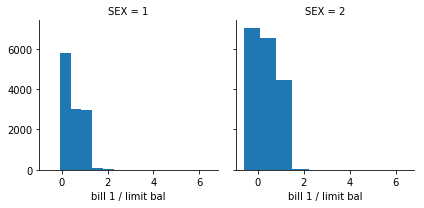

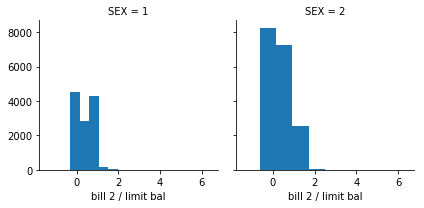

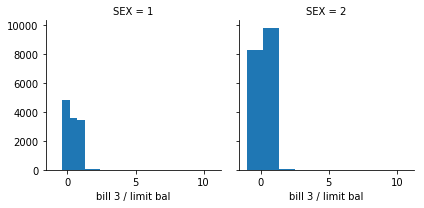

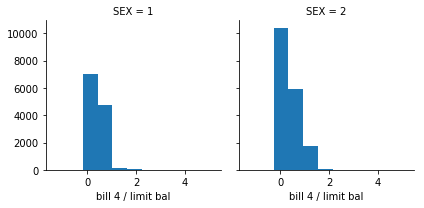

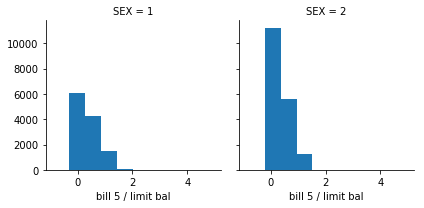

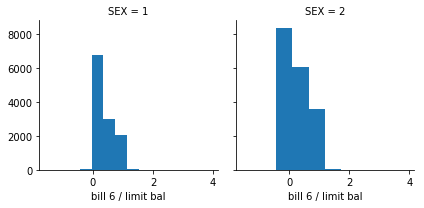

In [105]:
cols= 'bill 1 / limit bal', 'bill 2 / limit bal', 'bill 3 / limit bal','bill 4 / limit bal', 'bill 5 / limit bal', 'bill 6 / limit bal'
for i in cols:
    g = sns.FacetGrid(df, col="SEX")
    g.map(plt.hist, i)

(array([5.249e+03, 9.000e+00, 1.400e+01, 4.500e+01, 3.200e+01, 4.100e+01,
        2.800e+01, 2.500e+01, 2.800e+01, 3.700e+01, 8.000e+01, 1.890e+02,
        4.130e+02, 6.180e+02, 5.910e+02, 2.797e+03, 5.469e+03, 3.998e+03,
        3.697e+03, 2.757e+03, 1.827e+03, 9.370e+02, 4.480e+02, 2.890e+02,
        1.900e+02, 1.020e+02, 5.600e+01, 2.800e+01, 5.000e+00, 1.000e+00]),
 array([ 0.        ,  0.4560108 ,  0.91202161,  1.36803241,  1.82404321,
         2.28005401,  2.73606482,  3.19207562,  3.64808642,  4.10409722,
         4.56010803,  5.01611883,  5.47212963,  5.92814044,  6.38415124,
         6.84016204,  7.29617284,  7.75218365,  8.20819445,  8.66420525,
         9.12021605,  9.57622686, 10.03223766, 10.48824846, 10.94425927,
        11.40027007, 11.85628087, 12.31229167, 12.76830248, 13.22431328,
        13.68032408]),
 <a list of 30 Patch objects>)

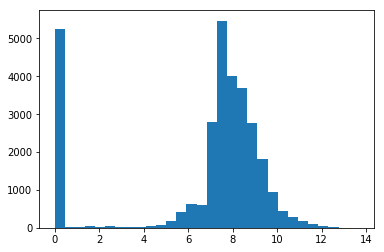

In [106]:
plt.hist(np.log1p(df['PAY_AMT1']),bins=30)

(array([5.396e+03, 1.500e+01, 3.800e+01, 3.600e+01, 3.500e+01, 4.700e+01,
        3.500e+01, 3.000e+01, 1.500e+01, 6.900e+01, 1.250e+02, 2.380e+02,
        7.620e+02, 6.090e+02, 2.378e+03, 5.501e+03, 4.135e+03, 3.854e+03,
        2.669e+03, 1.916e+03, 9.650e+02, 4.640e+02, 2.690e+02, 1.760e+02,
        1.310e+02, 5.900e+01, 2.700e+01, 2.000e+00, 1.000e+00, 3.000e+00]),
 array([ 0.        ,  0.47789456,  0.95578912,  1.43368369,  1.91157825,
         2.38947281,  2.86736737,  3.34526193,  3.82315649,  4.30105106,
         4.77894562,  5.25684018,  5.73473474,  6.2126293 ,  6.69052387,
         7.16841843,  7.64631299,  8.12420755,  8.60210211,  9.07999668,
         9.55789124, 10.0357858 , 10.51368036, 10.99157492, 11.46946948,
        11.94736405, 12.42525861, 12.90315317, 13.38104773, 13.85894229,
        14.33683686]),
 <a list of 30 Patch objects>)

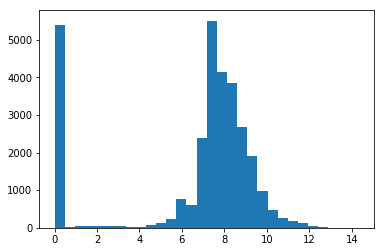

In [107]:
plt.hist(np.log1p(df['PAY_AMT2']),bins=30)

(array([6.408e+03, 2.200e+01, 2.200e+01, 3.300e+01, 4.600e+01, 3.900e+01,
        4.400e+01, 3.700e+01, 5.600e+01, 6.900e+01, 1.540e+02, 2.910e+02,
        5.130e+02, 1.321e+03, 1.482e+03, 3.420e+03, 2.375e+03, 3.380e+03,
        3.450e+03, 2.969e+03, 1.680e+03, 7.950e+02, 5.100e+02, 3.510e+02,
        2.330e+02, 1.670e+02, 8.000e+01, 3.700e+01, 1.100e+01, 5.000e+00]),
 array([ 0.        ,  0.44463627,  0.88927253,  1.3339088 ,  1.77854506,
         2.22318133,  2.66781759,  3.11245386,  3.55709013,  4.00172639,
         4.44636266,  4.89099892,  5.33563519,  5.78027145,  6.22490772,
         6.66954399,  7.11418025,  7.55881652,  8.00345278,  8.44808905,
         8.89272531,  9.33736158,  9.78199785, 10.22663411, 10.67127038,
        11.11590664, 11.56054291, 12.00517917, 12.44981544, 12.89445171,
        13.33908797]),
 <a list of 30 Patch objects>)

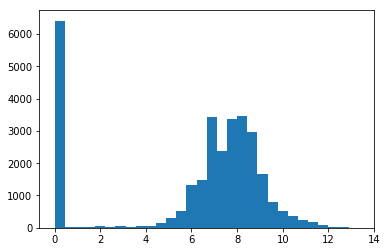

In [108]:
plt.hist(np.log1p(df['PAY_AMT4']),bins=30)

(array([5.968e+03, 1.300e+01, 1.900e+01, 4.700e+01, 4.200e+01, 4.700e+01,
        3.400e+01, 4.400e+01, 4.600e+01, 5.200e+01, 1.370e+02, 2.560e+02,
        5.740e+02, 1.012e+03, 1.260e+03, 3.723e+03, 4.468e+03, 3.476e+03,
        3.252e+03, 2.174e+03, 1.488e+03, 8.360e+02, 3.980e+02, 2.680e+02,
        1.560e+02, 1.270e+02, 5.600e+01, 1.900e+01, 6.000e+00, 2.000e+00]),
 array([ 0.        ,  0.45685805,  0.9137161 ,  1.37057414,  1.82743219,
         2.28429024,  2.74114829,  3.19800634,  3.65486439,  4.11172243,
         4.56858048,  5.02543853,  5.48229658,  5.93915463,  6.39601268,
         6.85287072,  7.30972877,  7.76658682,  8.22344487,  8.68030292,
         9.13716097,  9.59401901, 10.05087706, 10.50773511, 10.96459316,
        11.42145121, 11.87830926, 12.3351673 , 12.79202535, 13.2488834 ,
        13.70574145]),
 <a list of 30 Patch objects>)

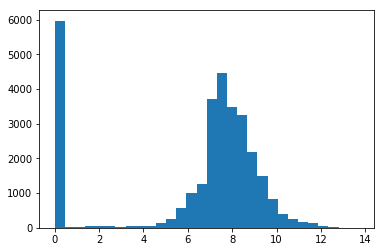

In [109]:
plt.hist(np.log1p(df['PAY_AMT3']),bins=30)

(array([6703.,   21.,   13.,   25.,   25.,   30.,   30.,   38.,   33.,
          42.,  104.,  206.,  287., 1053., 1177., 2978., 2410., 3353.,
        3205., 3144., 1890., 1384.,  751.,  401.,  250.,  185.,  153.,
          64.,   29.,   16.]),
 array([ 0.        ,  0.4321146 ,  0.8642292 ,  1.2963438 ,  1.7284584 ,
         2.160573  ,  2.5926876 ,  3.0248022 ,  3.4569168 ,  3.8890314 ,
         4.32114599,  4.75326059,  5.18537519,  5.61748979,  6.04960439,
         6.48171899,  6.91383359,  7.34594819,  7.77806279,  8.21017739,
         8.64229199,  9.07440659,  9.50652119,  9.93863579, 10.37075039,
        10.80286499, 11.23497959, 11.66709419, 12.09920878, 12.53132338,
        12.96343798]),
 <a list of 30 Patch objects>)

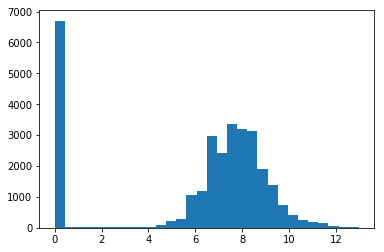

In [110]:
plt.hist(np.log1p(df['PAY_AMT5']),bins=30)

(array([7173.,   20.,    9.,   26.,   18.,   24.,   28.,   25.,   24.,
          45.,  121.,  202.,  435.,  980., 1480., 3024., 2284., 3423.,
        3439., 2925., 1823.,  838.,  564.,  367.,  265.,  174.,  135.,
          96.,   24.,    9.]),
 array([ 0.        ,  0.43927047,  0.87854093,  1.3178114 ,  1.75708187,
         2.19635234,  2.6356228 ,  3.07489327,  3.51416374,  3.95343421,
         4.39270467,  4.83197514,  5.27124561,  5.71051608,  6.14978654,
         6.58905701,  7.02832748,  7.46759795,  7.90686841,  8.34613888,
         8.78540935,  9.22467982,  9.66395028, 10.10322075, 10.54249122,
        10.98176169, 11.42103215, 11.86030262, 12.29957309, 12.73884356,
        13.17811402]),
 <a list of 30 Patch objects>)

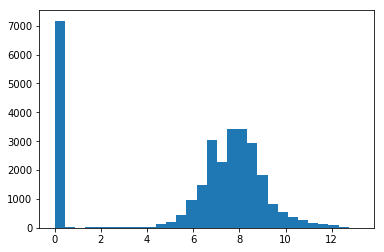

In [111]:
plt.hist(np.log1p(df['PAY_AMT6']),bins=30)

###### First without thinking of imbalance dataset .
 I am just using simple dataset and next using oversampling and undersampling and comparing the results.

In [277]:
X=df[['SEX', 'EDUCATION', 'MARRIAGE', 'AgeBin','bill 1 / limit bal', 'bill 2 / limit bal', 'bill 3 / limit bal',
       'bill 4 / limit bal', 'bill 5 / limit bal', 'bill 6 / limit bal','PAY_1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]

In [278]:
Y=df['def_pay']

In [279]:
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.3,random_state=1)

In [280]:
parameters={'max_features':[10,11,12,9,8,7],'n_estimators':[10,9,8,7,11,12,13]}

In [281]:
regr=RandomForestClassifier()
grid_search = GridSearchCV(estimator = regr, param_grid = parameters, cv =4)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [283]:
grid_search.best_params_

{'max_features': 7, 'n_estimators': 12}

In [285]:
regr=RandomForestClassifier(max_features=7, n_estimators= 12)
regr.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=7,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=12,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [287]:
rfpred=regr.predict(X_test)

In [288]:
print(accuracy_score(y_test,rfpred))
print(confusion_matrix(y_test, rfpred))
auc1 = roc_auc_score(y_test, rfpred)

0.8044444444444444
[[6597  403]
 [1357  643]]


0.6319642857142856


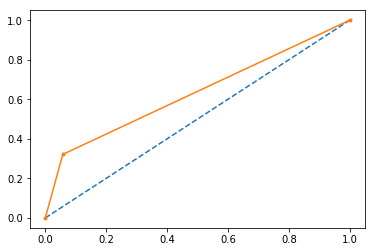

In [289]:
print(auc1)
fpr, tpr, thresholds = roc_curve(y_test,rfpred)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

AUC score is 0.622.

In [180]:
parameters= {'n_neighbors':[4,5,6,7,8,9]}

In [189]:
knn = KNeighborsClassifier()
grid_search = GridSearchCV(estimator = knn, param_grid = parameters, cv =4)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=4, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [4, 5, 6, 7, 8, 9]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [190]:
grid_search.best_params_

{'n_neighbors': 8}

In [194]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)

In [195]:
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))

0.7736666666666666
[[6784  216]
 [1821  179]]


In [196]:
scores = cross_val_score(knn,X_train, y_train, cv=5)
print ("Cross-validated scores:", scores)
print ("Average Cross-validated score:", scores.mean())

Cross-validated scores: [0.77404762 0.77404762 0.77285714 0.77761905 0.77928571]
Average Cross-validated score: 0.7755714285714286


0.5293214285714286


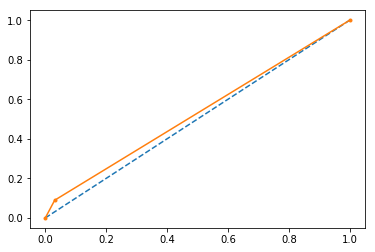

In [197]:
auc1 = roc_auc_score(y_test, y_pred)
print(auc1)
fpr, tpr, thresholds = roc_curve(y_test,y_pred)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

May be it's because of imbalancing of the data, that it's predicting power is so low. I need to see other methods which might deal with it well.

In [292]:
from sklearn.utils import resample

In [293]:
df_train=pd.concat([X_train,y_train],axis=1,sort=True)

In [294]:
df_train['def_pay'].value_counts()

0    16364
1     4636
Name: def_pay, dtype: int64

In [295]:
df_majority = df_train[df.def_pay==0]
df_minority = df_train[df.def_pay==1]

C:\Users\bhardwaj\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
C:\Users\bhardwaj\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [296]:
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=16354,    # to match majority class
                                 random_state=123) # reproducible results

In [297]:
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

In [298]:
df_upsampled.def_pay.value_counts()

0    16364
1    16354
Name: def_pay, dtype: int64

In [299]:
y = df_upsampled.def_pay
X = df_upsampled.drop('def_pay', axis=1)

In [300]:
regr

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=7,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=12,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [301]:
regr_fit=regr.fit(X,y)

In [302]:
pred_y_1 = regr_fit.predict(X_test)

In [303]:
print(accuracy_score(y_test,pred_y_1))
print(confusion_matrix(y_test, pred_y_1))
auc1 = roc_auc_score(y_test, pred_y_1)

0.7928888888888889
[[6361  639]
 [1225  775]]


0.6481071428571429


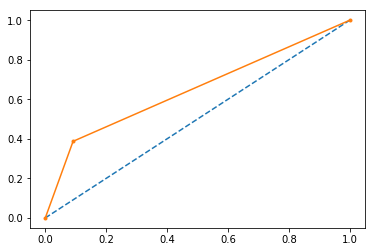

In [304]:
print(auc1)
fpr, tpr, thresholds = roc_curve(y_test,pred_y_1)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

In [305]:
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=4636,     # to match minority class
                                 random_state=123) # reproducible results

In [306]:
df_downsampled = pd.concat([df_majority_downsampled, df_minority])

In [307]:
df_downsampled.def_pay.value_counts()

1    4636
0    4636
Name: def_pay, dtype: int64

In [308]:
y1 = df_upsampled.def_pay
X1 = df_upsampled.drop('def_pay', axis=1)
regr_fit1=regr.fit(X1,y1)

In [309]:
pred_y_11 = regr_fit1.predict(X_test)

In [310]:
print(accuracy_score(y_test,pred_y_11))
print(confusion_matrix(y_test, pred_y_11))
auc1 = roc_auc_score(y_test, pred_y_11)

0.7923333333333333
[[6356  644]
 [1225  775]]


In [311]:
print(classification_report(y_test,pred_y_11))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      7000
           1       0.55      0.39      0.45      2000

    accuracy                           0.79      9000
   macro avg       0.69      0.65      0.66      9000
weighted avg       0.77      0.79      0.78      9000



0.6477499999999999


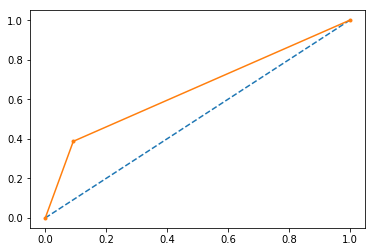

In [312]:
print(auc1)
fpr, tpr, thresholds = roc_curve(y_test,pred_y_11)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

In [313]:
from sklearn.svm import SVC
X=df[['SEX', 'EDUCATION', 'MARRIAGE', 'AgeBin','bill 1 / limit bal', 'bill 2 / limit bal', 'bill 3 / limit bal',
       'bill 4 / limit bal', 'bill 5 / limit bal', 'bill 6 / limit bal','PAY_1']]
Y=df['def_pay']
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.3,random_state=1)

In [314]:
clf_3 = SVC(kernel='linear', class_weight='balanced',probability=True)
clf_3.fit(X_train, y_train)
pred_y_3 = clf_3.predict(X_test)

In [226]:
print(accuracy_score(y_test,pred_y_3))
print(confusion_matrix(y_test, pred_y_3))

0.8125555555555556
[[6520  480]
 [1207  793]]


0.6639642857142857


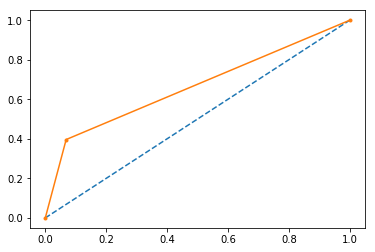

In [227]:
auc1 = roc_auc_score(y_test, pred_y_3)
print(auc1)
fpr, tpr, thresholds = roc_curve(y_test,pred_y_3)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

###### Using SMOTE to oversample the minority class in the dataset.

In [262]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2) 

In [229]:
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel()) 

In [230]:
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape)) 

After OverSampling, the shape of train_X: (32728, 11)


In [231]:
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 

After OverSampling, the shape of train_y: (32728,) 



In [232]:
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0))) 

After OverSampling, counts of label '1': 16364
After OverSampling, counts of label '0': 16364


In [233]:
regr.fit(X_train_res,y_train_res)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [234]:
predictions = regr.predict(X_test) 

In [235]:
print(accuracy_score(y_test,predictions))

0.7665555555555555


In [236]:
from sklearn.metrics import classification_report 

In [237]:
print(classification_report(y_test, predictions)) 

              precision    recall  f1-score   support

           0       0.86      0.84      0.85      7000
           1       0.48      0.50      0.49      2000

    accuracy                           0.77      9000
   macro avg       0.67      0.67      0.67      9000
weighted avg       0.77      0.77      0.77      9000



The recall of the minority class in very less. It proves that the model is more biased towards majority class. So, it proves that this is not the best model.

In [159]:
df['def_pay'].value_counts()

0    23364
1     6636
Name: def_pay, dtype: int64

###### Now using NearMiss for undersampling of majority class.

In [263]:
from imblearn.under_sampling import NearMiss 

In [264]:
nr = NearMiss() 

In [265]:
X_train_miss, y_train_miss = nr.fit_sample(X_train, y_train.ravel()) 

In [266]:
print('After Undersampling, the shape of train_X: {}'.format(X_train_miss.shape)) 
print('After Undersampling, the shape of train_y: {} \n'.format(y_train_miss.shape)) 
  
print("After Undersampling, counts of label '1': {}".format(sum(y_train_miss == 1))) 
print("After Undersampling, counts of label '0': {}".format(sum(y_train_miss == 0))) 

After Undersampling, the shape of train_X: (9272, 11)
After Undersampling, the shape of train_y: (9272,) 

After Undersampling, counts of label '1': 4636
After Undersampling, counts of label '0': 4636


In [267]:
regr.fit(X_train_miss, y_train_miss)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [268]:
predictions = regr.predict(X_test) 

In [269]:
print(classification_report(y_test, predictions)) 

              precision    recall  f1-score   support

           0       0.83      0.32      0.46      7000
           1       0.25      0.78      0.37      2000

    accuracy                           0.42      9000
   macro avg       0.54      0.55      0.42      9000
weighted avg       0.70      0.42      0.44      9000



This model is better than the first model because it classifies better and also the recall value of minority class is 77 %. But due to undersampling of majority class, its recall has decreased to 34 %. So in this case, SMOTE is giving me a great accuracy and recall, I’ll go ahead and use that model! 

Clearly, among random forest in case of imbalanced dataset,SMOTE and nearmiss, Nearmiss is doing the best job.